<a href="https://colab.research.google.com/github/LatiefDataVisionary/scikit-learn-with-indonesia-belajar/blob/main/SKLearn_05_Simple_Linear_Regression_dengan_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **SKLearn 05: Simple Linear Regression dengan Scikit-Learn | Belajar Machine Learning Dasar**


### **Sample Dataset**

In [18]:
import pandas as pd

pizza = {'diameter': [6,8,10,14,18],
         'harga': [7,9,13,17.5,18]}

pizza_df = pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


### **Visualisasi Data**

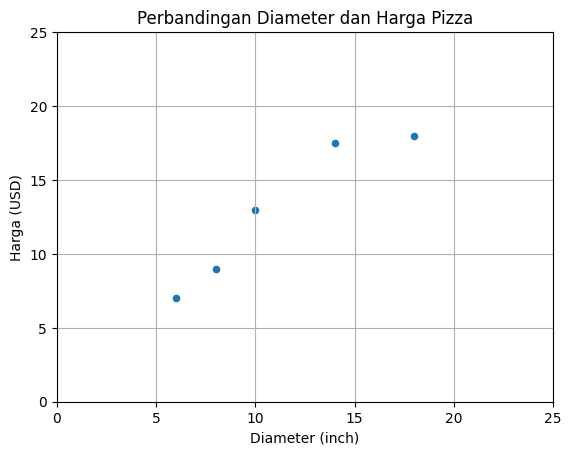

In [19]:
import matplotlib.pyplot as plt

pizza_df.plot(kind='scatter', x='diameter', y='harga')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('Harga (USD)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

### **Simple Linear Regression**

**Penyesuaian Dataset**

In [20]:
import numpy as np

X = np.array(pizza_df['diameter'])
y = np.array(pizza_df['harga'])

print(f'X: {X}')
print(f'y: {y}')

X: [ 6  8 10 14 18]
y: [ 7.   9.  13.  17.5 18. ]


In [21]:
X = X.reshape(-1, 1)
X.shape

(5, 1)

In [22]:
X

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]])